<a href="https://colab.research.google.com/github/HarshShetye/Djs_Compute_Task/blob/main/ML_Task_6_DecisionTree_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree 

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [30]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

**Loading Data**

In [31]:
# load dataset
data = pd.read_csv("/content/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [33]:
#split dataset in features and target variable
data_inde = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
data_de = data[['Outcome']].values

**Splitting Data**

In [34]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(data_inde, data_de, test_size = 0.25, random_state = 42)

**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [35]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion = 'gini')
# Train Decision Tree Classifer
classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

**Evaluating Model**

In [36]:
# Model Accuracy, how often is the classifier correct?
Accuracy = metrics.accuracy_score(y_pred,y_test)
print(Accuracy)

0.6770833333333334


In [37]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[86 37]
 [25 44]]


In [38]:
clf_report = metrics.classification_report(y_pred,y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.70      0.77      0.74       111
           1       0.64      0.54      0.59        81

    accuracy                           0.68       192
   macro avg       0.67      0.66      0.66       192
weighted avg       0.67      0.68      0.67       192



**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [39]:
!pip install graphviz
!pip install six
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


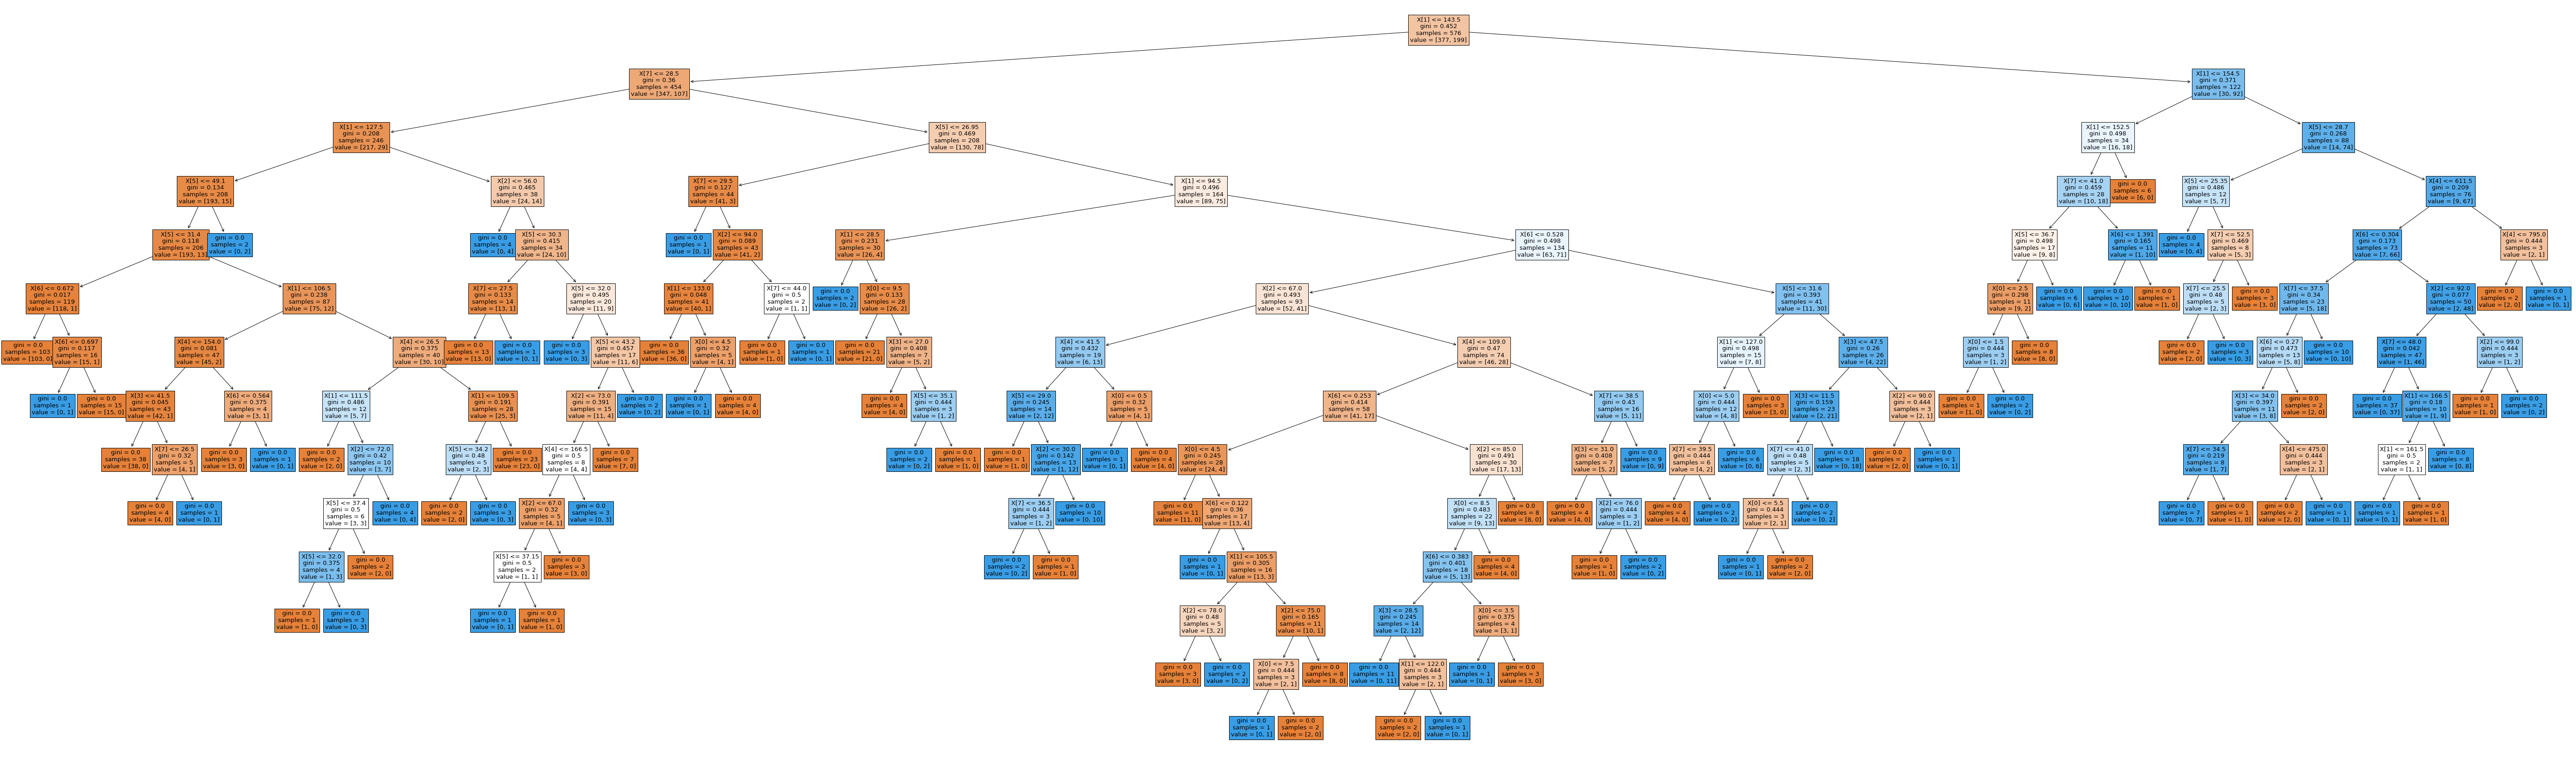

In [61]:
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus

plt.figure(figsize=(100,30))
tree.plot_tree(classifier,filled = True, fontsize=13)
plt.show()

**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

In [62]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier( criterion= 'gini', max_features= 'log2', max_depth= 9, ccp_alpha= 0.01)
# Train Decision Tree Classifer
classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[91 32]
 [24 45]]


0.7083333333333334

**Visualizing Decision Trees**

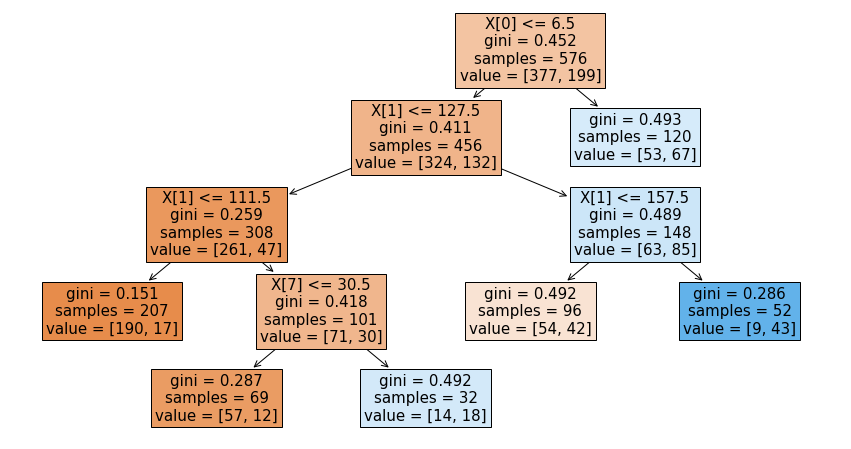

In [66]:
plt.figure(figsize=(15,8))
tree.plot_tree(classifier,filled = True, fontsize=15)
plt.show()

**Implement Random Forest**

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Create RandomForest Tree classifer object
classifier=RandomForestClassifier(random_state=0)
# Train RandomForest Tree Classifer
classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred=classifier.predict(X_test)
y_pred_1=classifier.predict(X_train)
# Model Accuracy, how often is the classifier correct?
test_acc = metrics.accuracy_score(y_pred,y_test)
print(test_acc)
train_acc = metrics.accuracy_score(y_pred_1,y_train)
print(train_acc)

<ipython-input-70-42ee44b7636b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,y_train)


0.75
1.0


If the model overfitting try out different way to fix it!!

In [86]:
model = RandomForestClassifier(
    max_depth=3, n_estimators=35,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=42)
 
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_1=model.predict(X_train)
test_acc = metrics.accuracy_score(y_pred,y_test)
print(test_acc)
train_acc = metrics.accuracy_score(y_pred_1,y_train)
print(train_acc)

0.7604166666666666
0.796875


<ipython-input-86-23761b50d6e1>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


### All the best!!! I hope you will Enjoy the Task!